In [1]:
import os
import json
import numpy  as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
FOLDER = 'disk/ERIK_ADVANCED_PRACTICAL/Q&Adata/'
QFOLDER = 'disk/ERIK_ADVANCED_PRACTICAL/Q_only_data'
path = 'disk/ERIK_ADVANCED_PRACTICAL/DataSet/'

In [3]:
def statistics(FOLDER):
    length_of_data={}
    total=0
    for file in os.listdir(FOLDER):

        if not os.path.isdir(FOLDER+'/'+file):

            field=file.split('.')[0]
            file=open(FOLDER+'/'+file,'r')
            data=json.load(file)
            length_of_data[field]=len(data)
            total+=len(data)
            print(field,length_of_data[field])
    output=open('QandAstatistics.json','w')
    json.dump(length_of_data,output,ensure_ascii=False)
    print(len(length_of_data.keys()))
    print('total questions : ',total)
    return length_of_data

In [4]:
stat = statistics(FOLDER)

Steuerrecht 5619
Sozialversicherungsrecht 1992
Schadensersatz 2096
Baurecht & Architektenrecht 3682
Internetrecht & Computerrecht 3261
Mietrecht & Wohnungseigentum 17213
Hauskauf & Immobilien & Grundstuecke 2810
Reiserecht 833
Schule & Hochschule & Pruefungen 390
Urheberrecht & Markenrecht & Patentrecht 2825
Datenschutzrecht 533
Transportrecht & Speditionsrecht 228
Gesellschaftsrecht 1758
Kredite 884
Verwaltungsrecht 2142
Vertragsrecht 8767
Versicherungsrecht & Privatversicherungsrecht 2762
Erbrecht 7694
Generelle Themen 6402
Tierrecht & Tierkaufrecht 528
Nachbarschaftsrecht 2501
Medizinrecht 693
Internetauktionen 2053
Strafrecht 6433
Auslaenderrecht 2515
Wirtschaftsrecht & Bankrecht & Wettbewerbsrecht 1556
Sozialrecht 5060
Medienrecht 418
Inkasso & Mahnungen 1686
Zwangsvollstreckung & Zwangsversteigerung 1038
Insolvenzrecht 2625
Anwaltsrecht & Gebuehrenrecht 1414
Vereinsrecht 500
Internationales Recht 552
Familienrecht 12797
Kaufrecht 5787
Arbeitsrecht 13751
Verkehrsrecht 3462
38
tota

In [5]:
stat_Qo = statistics(QFOLDER)

Steuerrecht 10899
Bankrecht 1848
Zwangsvollstreckung, Zwangsversteigerung 717
Mietrecht 37438
Datenschutzrecht 1203
Baurecht 4700
Verwaltungsrecht 1649
Erbrecht 7304
Strafrecht 16087
Sozialrecht und staatliche Leistungen 6621
Auslaenderrecht 3679
Inkasso 10824
Insolvenzrecht 2324
Auto - Kauf und Verkauf 7248
Versicherungsrecht 2904
Kaufrecht 12841
Markenrecht 844
Arbeitsrecht 28314
Urheberrecht 1533
Patentrecht 15
20
total questions :  158992


In [6]:
all_areas = set(list(stat.keys())+list(stat_Qo.keys()))

In [7]:
all_areas = sorted(all_areas)

In [8]:
# get a unified list of all areas and the number of samples with/without answers for each erea 
q_only = []
qanda = []

for area in all_areas:
    print(area)
    try:
        qanda.append(stat[area])
    except  :
        qanda.append(0)
    try:
        q_only.append(stat_Qo[area])
    except :
        q_only.append(0)

Anwaltsrecht & Gebuehrenrecht
Arbeitsrecht
Auslaenderrecht
Auto - Kauf und Verkauf
Bankrecht
Baurecht
Baurecht & Architektenrecht
Datenschutzrecht
Erbrecht
Familienrecht
Generelle Themen
Gesellschaftsrecht
Hauskauf & Immobilien & Grundstuecke
Inkasso
Inkasso & Mahnungen
Insolvenzrecht
Internationales Recht
Internetauktionen
Internetrecht & Computerrecht
Kaufrecht
Kredite
Markenrecht
Medienrecht
Medizinrecht
Mietrecht
Mietrecht & Wohnungseigentum
Nachbarschaftsrecht
Patentrecht
Reiserecht
Schadensersatz
Schule & Hochschule & Pruefungen
Sozialrecht
Sozialrecht und staatliche Leistungen
Sozialversicherungsrecht
Steuerrecht
Strafrecht
Tierrecht & Tierkaufrecht
Transportrecht & Speditionsrecht
Urheberrecht
Urheberrecht & Markenrecht & Patentrecht
Vereinsrecht
Verkehrsrecht
Versicherungsrecht
Versicherungsrecht & Privatversicherungsrecht
Vertragsrecht
Verwaltungsrecht
Wirtschaftsrecht & Bankrecht & Wettbewerbsrecht
Zwangsvollstreckung & Zwangsversteigerung
Zwangsvollstreckung, Zwangsversteig

In [9]:
len(qanda)

49

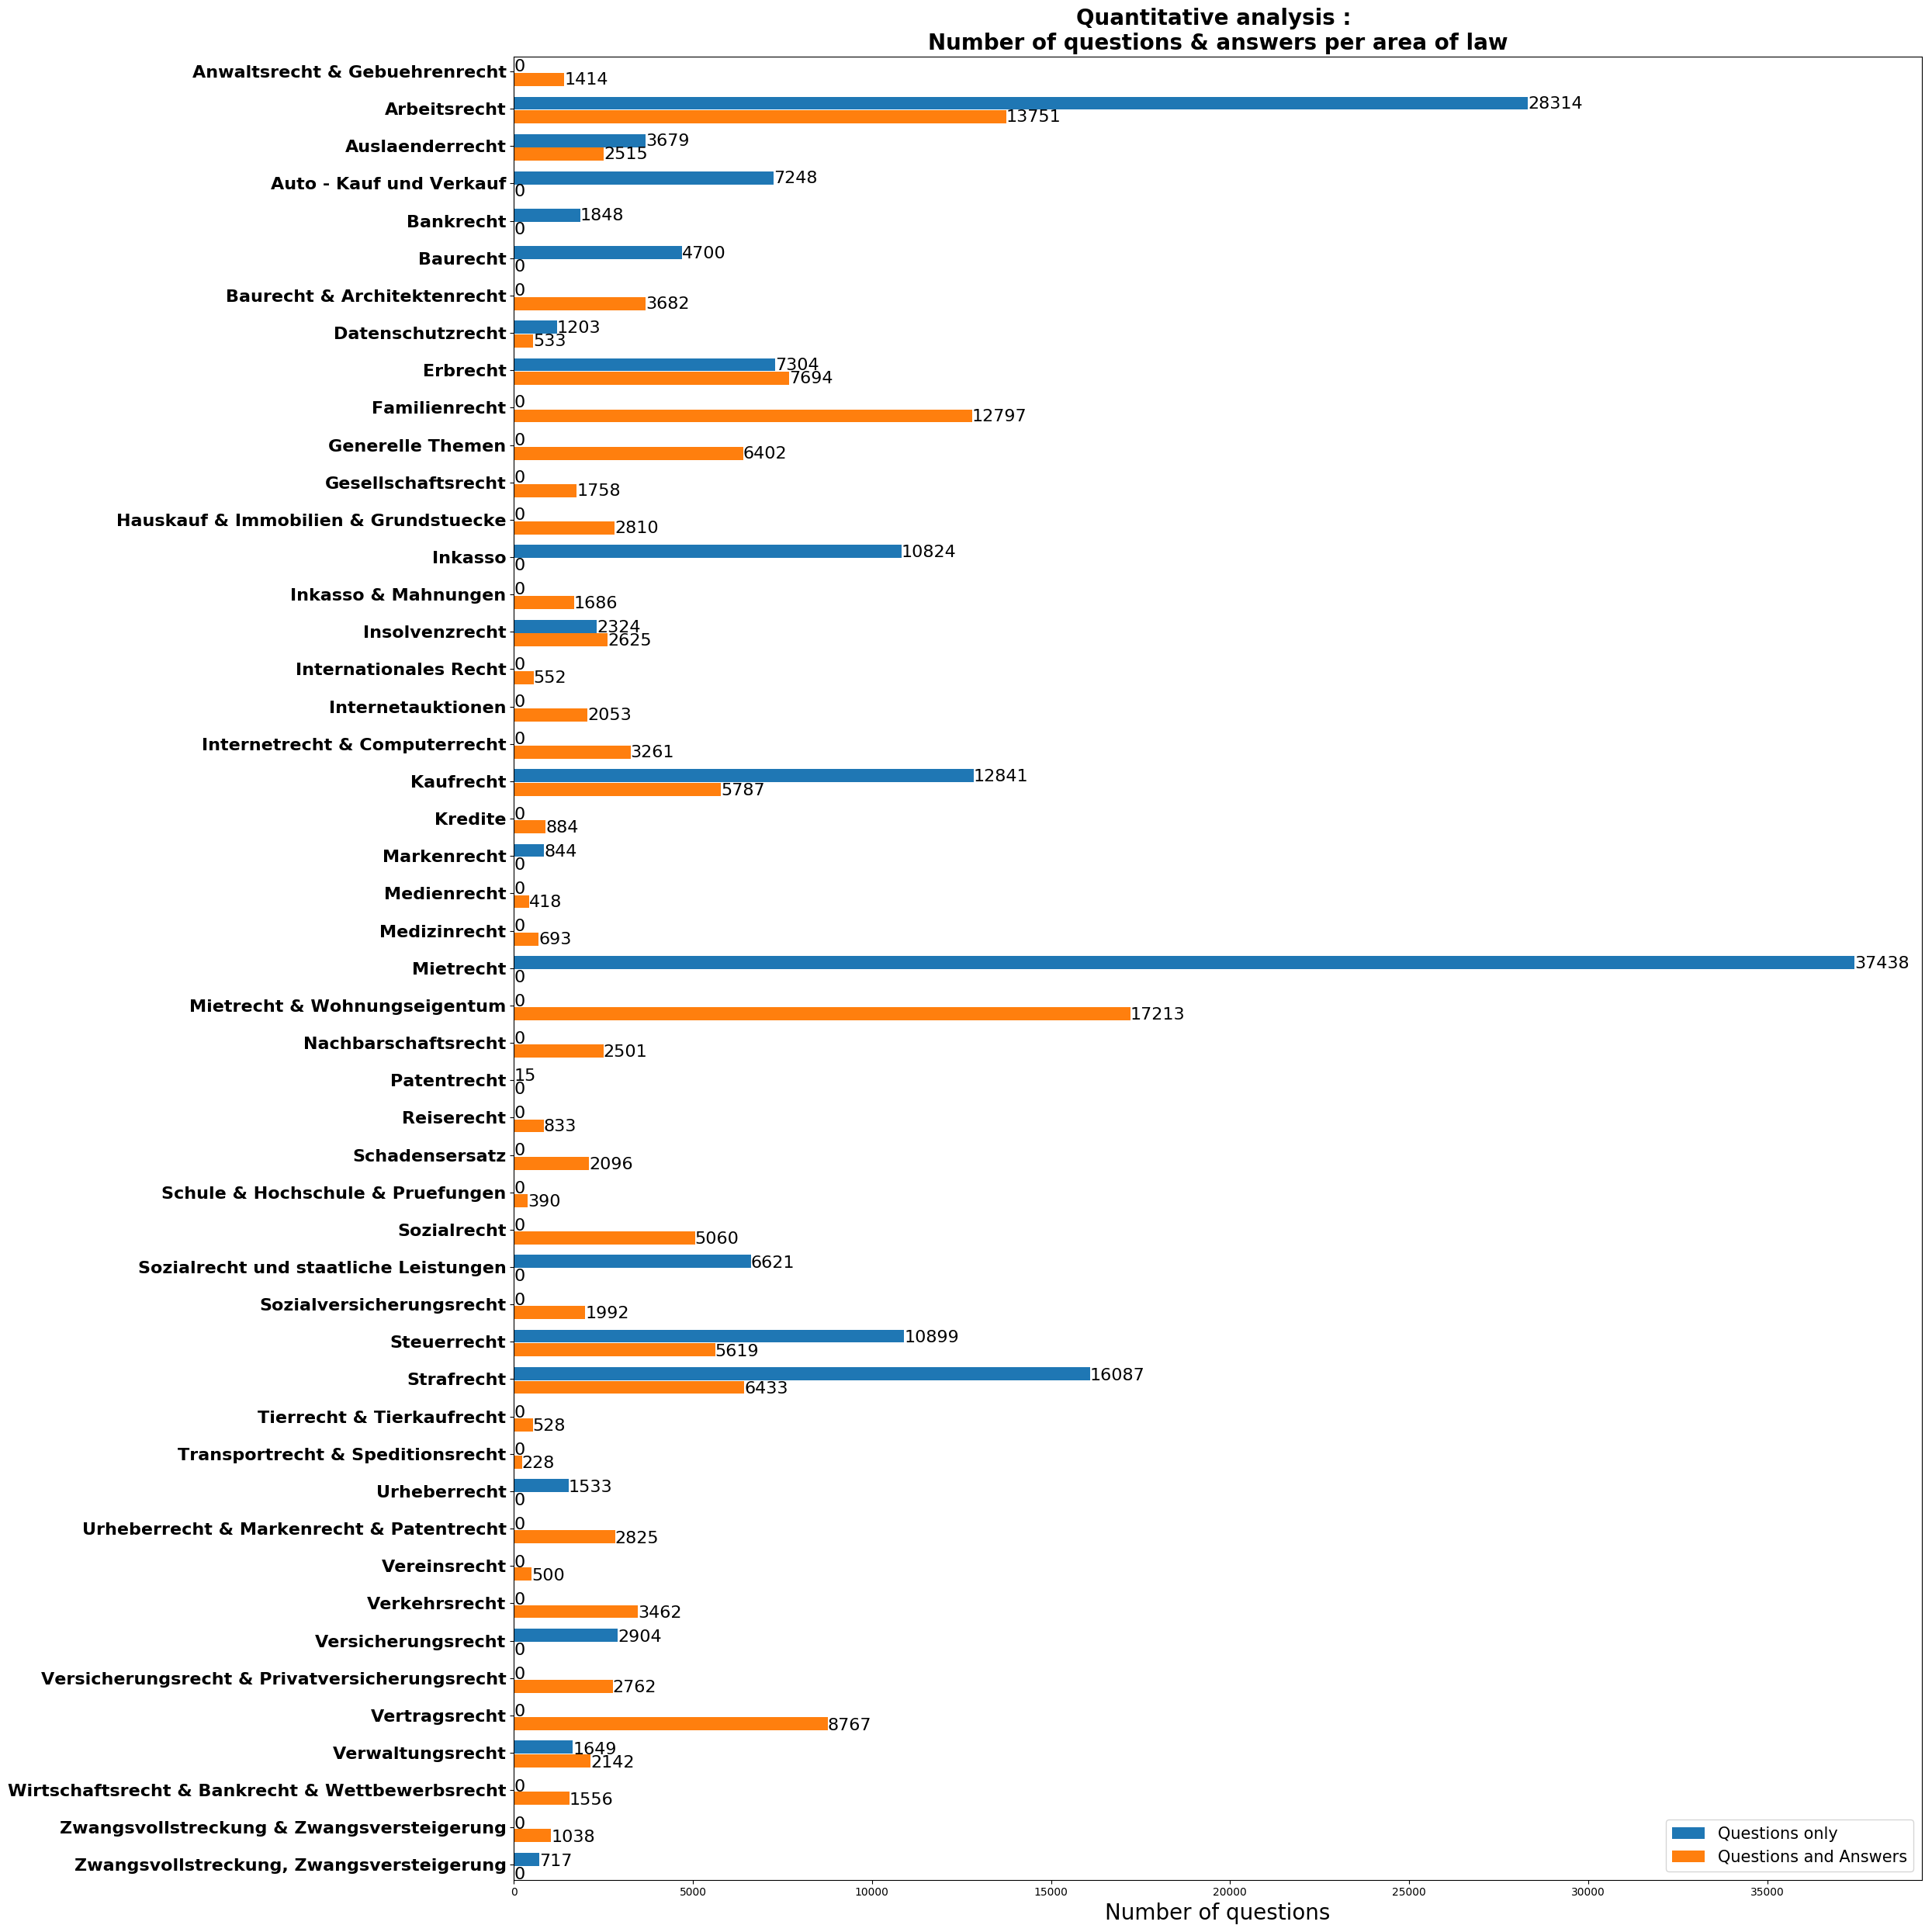

In [10]:
plt.rcdefaults()
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111)
legend_data = ['Questions only','Questions and Answers']
# Example data
areas_of_law = all_areas
y_pos = np.arange(len(areas_of_law))
n_samples = q_only
n_samplesQ = qanda
bar1 = ax.barh(y_pos-0.15, n_samples,height=0.35)
bar2 = ax.barh(y_pos+0.22, n_samplesQ,height=0.35)
ax.set_yticks(y_pos)
ax.set_yticklabels(areas_of_law,weight='bold')
plt.ylim(-0.4,len(areas_of_law)-0.6)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of questions',fontsize=20)
ax.set_title('Quantitative analysis : \nNumber of questions & answers per area of law',fontsize=20,weight='bold')
i = -0.01
for rect in zip(bar1,bar2):
    height = rect[0].get_width()
    plt.text(height,i, '%d' % int(height),fontsize = 16)# ha='center', va='bottom')
    i+=0.357
    height = rect[1].get_width()
    plt.text(height,i, '%d' % int(height),fontsize = 16)# ha='center', va='bottom')
    i+=0.644
plt.legend(legend_data,loc=4,prop={'size':15})
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('disk/ERIK_ADVANCED_PRACTICAL/Q&A_bar_updated_3qtr')

In [11]:
dataset_statistics=[]
def dataset_statistics_(dataset_statistics):
    i = 0
    for file in os.listdir(path):
        if os.path.isdir(os.path.join(path,file)):
            continue
        print(file)
        file_ = open(path+file,'r')
        file_ = json.load(file_)
        dataset_statistics.append({})
        separate_areas = []
        separate_areas_count = []
        with_answers = []
        explode = []
        old_area = None
        j=-1
        k=-1
        for entry in file_:
            if entry['area']!= old_area and entry['area'] not in separate_areas and (entry['area']+' Q only') not in separate_areas:
                separate_areas.append('')
                separate_areas.append('')
                j+=2
                k+=1
                separate_areas_count.append(0)
                with_answers.append(0)
                with_answers.append(0)
                explode.append(0)
                explode.append(0)

            try:
                # record the number of questions with answers for each of the separate areas in a dataset file
                _=entry['answer']
                if entry['area'] not in separate_areas:
                    separate_areas[-2] = entry['area']

                with_answers[j-1]+=1
            # if there is no 'answer' then the data is part of the Q only collection
            except KeyError:
                if (entry['area']+' Q only') not in separate_areas:
                    separate_areas[-1] = entry['area']+' Q only'
                    explode[-1] = 0.15
                with_answers[j]+=1
                pass
            separate_areas_count[k]+=1
        dataset_statistics[i]['area']=file[:-5]
        dataset_statistics[i]['separate_areas']=separate_areas
        dataset_statistics[i]['areas_count']=separate_areas_count
        dataset_statistics[i]['with_answers_count']=with_answers
        dataset_statistics[i]['explode']=explode
        i+=1

In [12]:
dataset_statistics_(dataset_statistics)

Steuerrecht.json
Sozialversicherungsrecht.json
Mietrecht & Wohnungseigentum.json
Vertragsrecht.json
Erbrecht.json
Oeffentlichesrecht.json
Strafrecht.json
Familienrecht.json
Kaufrecht.json
Arbeitsrecht.json


In [14]:
def plot_dataset_statistics():
    fig = plt.figure(figsize=(23,23))
    cmap = plt.get_cmap("tab20c")
    
    fig.suptitle('Quantitative analysis:\nContent of dataset regarding the presence of Q only samples', fontsize = 26, weight = 'bold')
    j = 0
    if int(len(dataset_statistics)%2)==1:
        ax = fig.subplots(len(dataset_statistics),1)
        for i in dataset_statistics:
            patches, texts, autotexts=ax[j].pie(i['with_answers_count'],labels=i['separate_areas'],explode = i['explode'],shadow=True, autopct = lambda p: '{:,.0f}'.format(p * sum(i['areas_count'])/100) if p>0 else '')
            ax[j].set_title(i['area'],fontsize= 20,weight='bold')
            [_.set_fontsize(17) for _ in texts]
            [_.set_fontsize(15) for _ in autotexts]
            j+=1
    else:
        ax = fig.subplots(int(len(dataset_statistics)/2),2)
        for i in dataset_statistics:
            patches, texts, autotexts=ax[int(j/2),int(j%2)].pie(i['with_answers_count'],labels=i['separate_areas'],explode = i['explode'],shadow=True, autopct = lambda p: '{:,.0f}'.format(p * sum(i['areas_count'])/100) if p>0 else '')
            ax[int(j/2),int(j%2)].set_title(i['area'],fontsize= 20,weight='bold')
            [_.set_fontsize(17) for _ in texts]
            [_.set_fontsize(15) for _ in autotexts]
            j+=1
    #plt.savefig('disk/ERIK_ADVANCED_PRACTICAL/Dataset_2019_9_24_1/fig_')

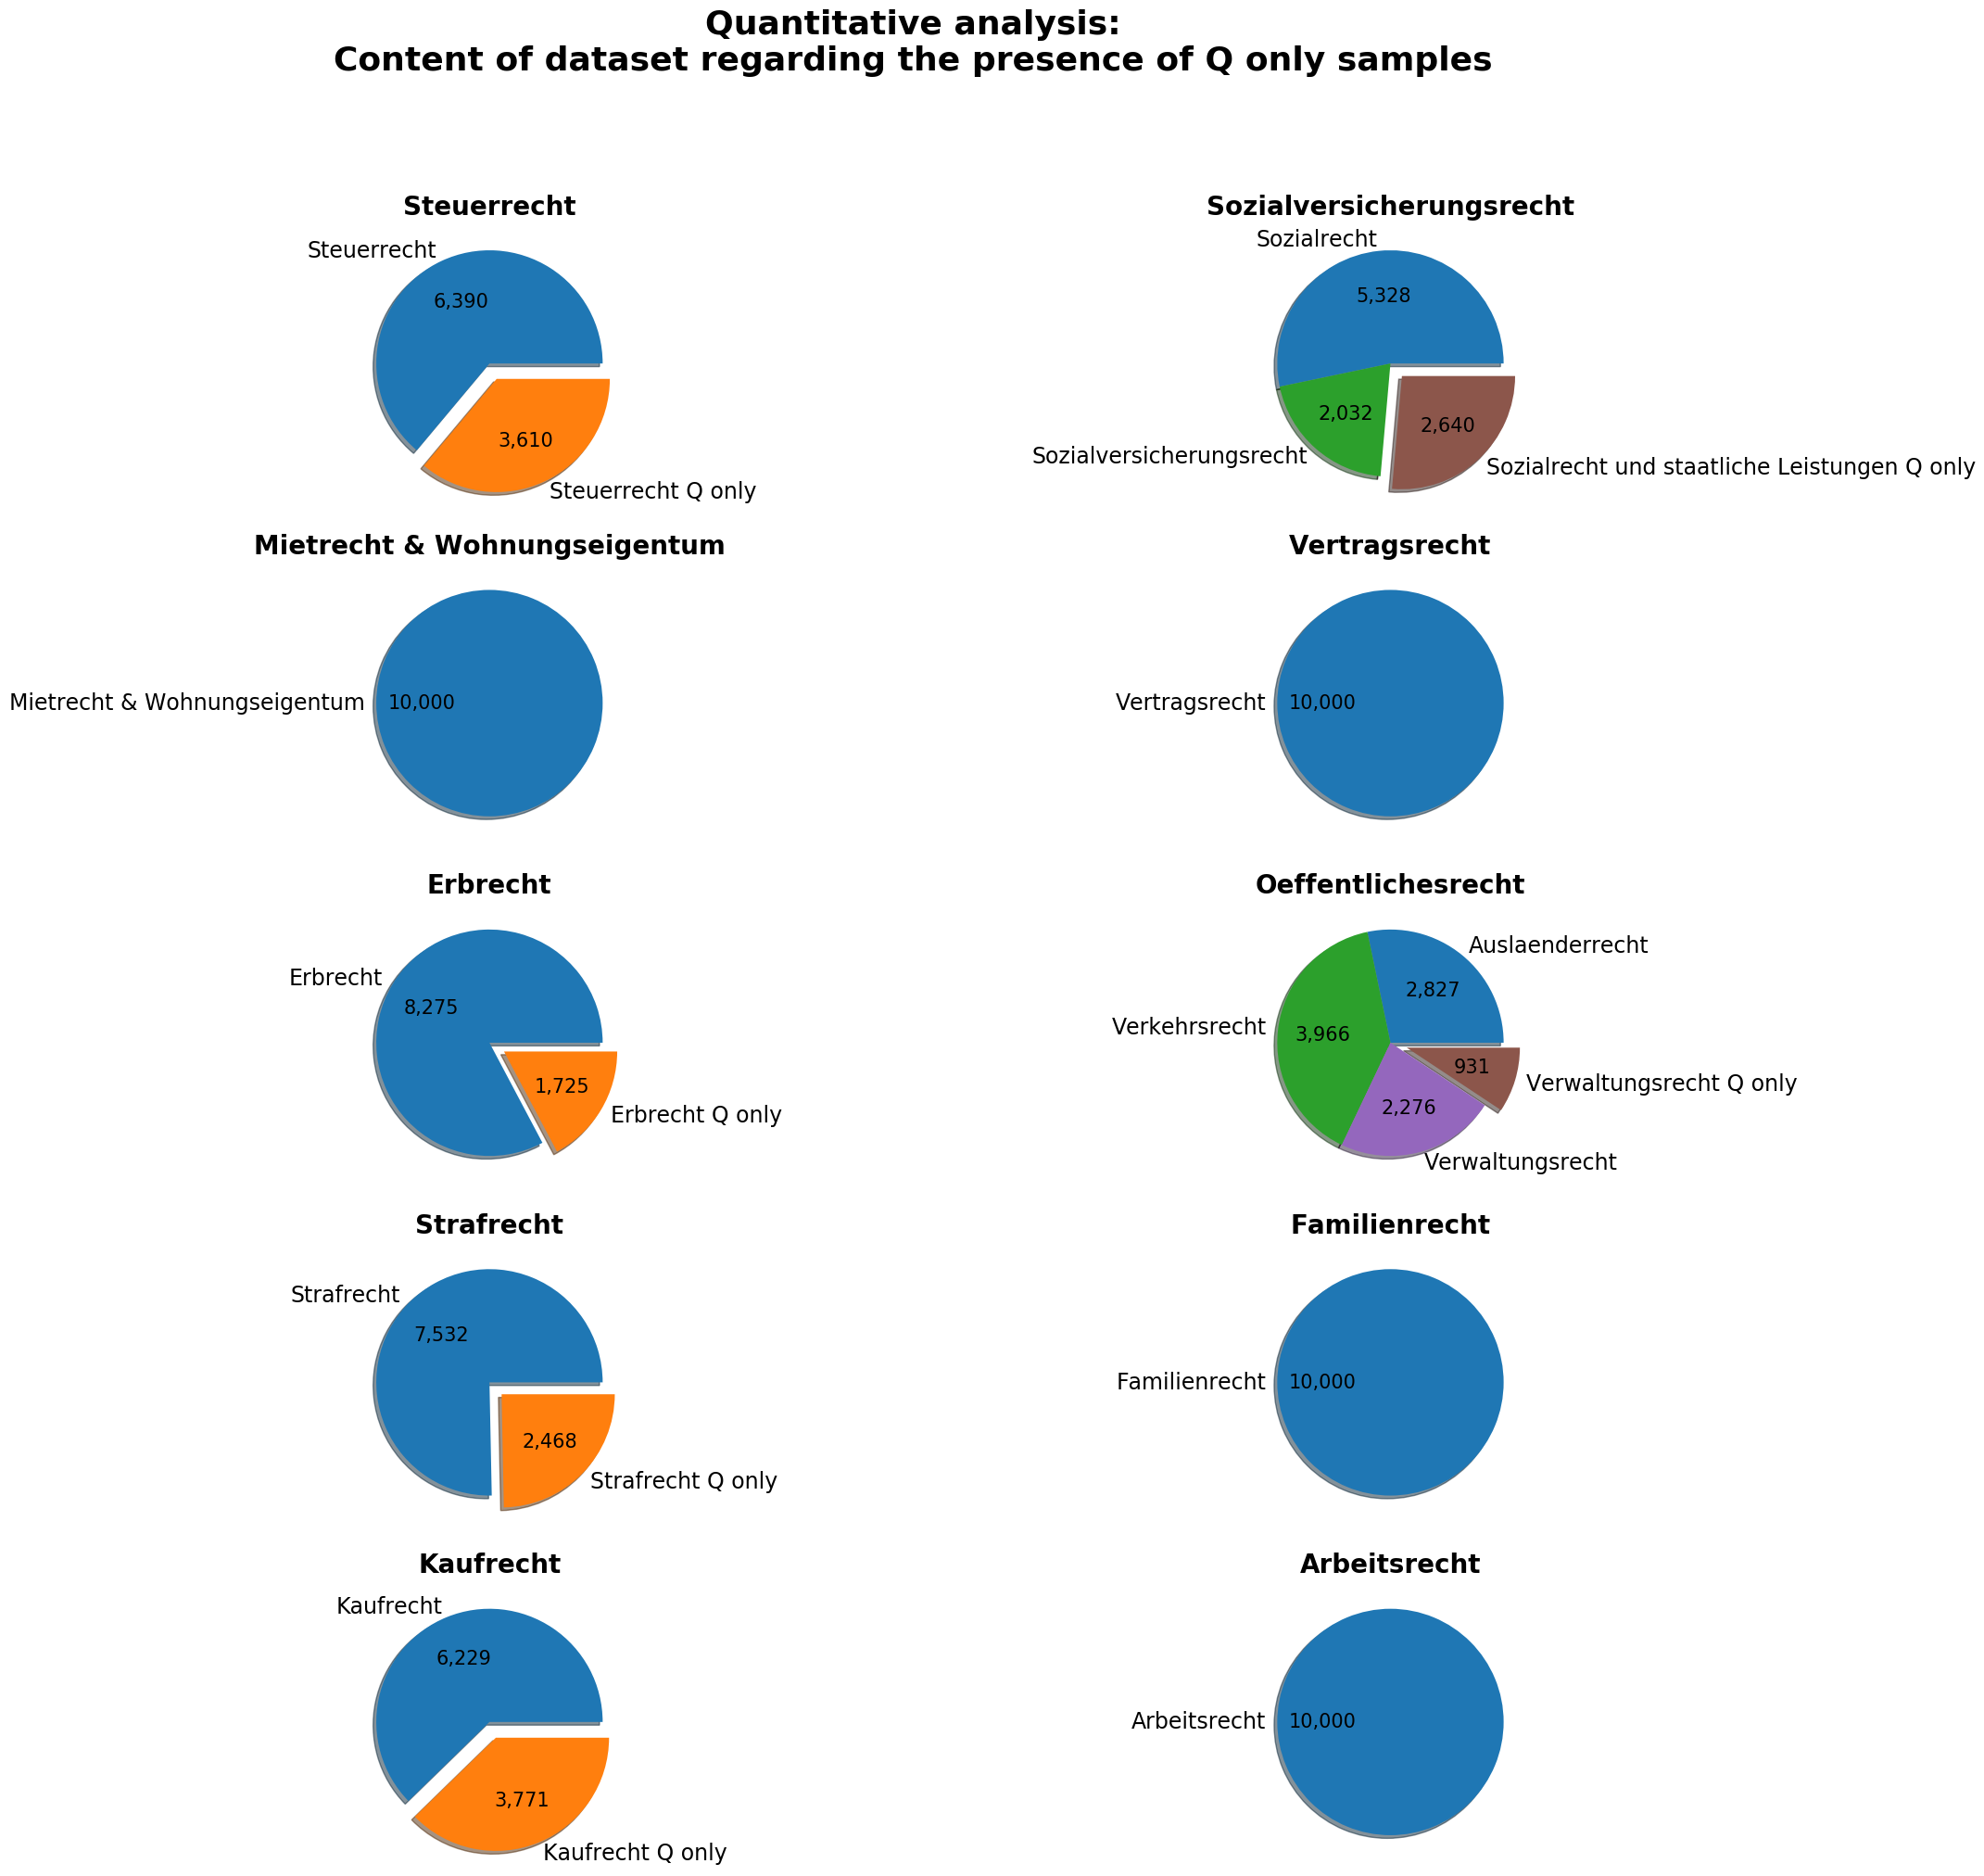

In [15]:
plot_dataset_statistics()

### Analyze word frequency

In [2]:
from collections import Counter
import re

In [10]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^a-zäüöß ]')
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    # delete symbols which are in BAD_SYMBOLS_RE from text
    text = BAD_SYMBOLS_RE.sub('',text)

    return text

In [11]:
old_counter = None
for file in os.listdir(path):
    print(file)
    file_ = open(path+file,'r')
    file_ = json.load(file_)
    all_texts = []

    for entry in file_:
        all_texts += text_prepare(entry['question'].lower()).split()
    new_counter = Counter(all_texts)

    if old_counter==None:
        old_counter = new_counter
    else:
        for key in set(list(old_counter.keys())+list(new_counter.keys())):
            old_counter[key]+=new_counter[key]
    print(old_counter['ich'])        

Steuerrecht.json
43011
Sozialversicherungsrecht.json
95471
Mietrecht & Wohnungseigentum.json
132769
Vertragsrecht.json
186458
Erbrecht.json
213970
Oeffentlichesrecht.json
264427
Strafrecht.json
330592
Familienrecht.json
377390
Kaufrecht.json
430359
Arbeitsrecht.json
482215


In [15]:
old_counter.most_common(150)

[('ich', 482215),
 ('die', 465559),
 ('der', 459424),
 ('und', 445842),
 ('in', 240823),
 ('das', 228156),
 ('nicht', 205685),
 ('zu', 192371),
 ('ist', 188376),
 ('eine', 172860),
 ('von', 163615),
 ('den', 162968),
 ('mit', 159304),
 ('für', 149322),
 ('habe', 145529),
 ('im', 132578),
 ('es', 131335),
 ('auf', 130910),
 ('ein', 129409),
 ('dass', 119865),
 ('auch', 114647),
 ('dem', 113575),
 ('des', 109757),
 ('mir', 106652),
 ('hat', 106194),
 ('sie', 95341),
 ('bei', 94980),
 ('einen', 90663),
 ('er', 88131),
 ('meine', 87817),
 ('sich', 85853),
 ('wir', 84819),
 ('nach', 84326),
 ('wurde', 82117),
 ('als', 78548),
 ('an', 77239),
 ('oder', 75905),
 ('mich', 75174),
 ('kann', 74546),
 ('noch', 73869),
 ('da', 73774),
 ('einer', 66198),
 ('aber', 60562),
 ('aus', 58940),
 ('wie', 58367),
 ('um', 57768),
 ('werden', 56553),
 ('nun', 56286),
 ('mein', 55843),
 ('wenn', 55715),
 ('haben', 55349),
 ('am', 55008),
 ('dann', 54555),
 ('einem', 54279),
 ('war', 53552),
 ('wird', 53398),


In [9]:
stopwords = []
counts = []
for word,count in old_counter.most_common(100):
    stopwords.append(word)
    counts.append(count)

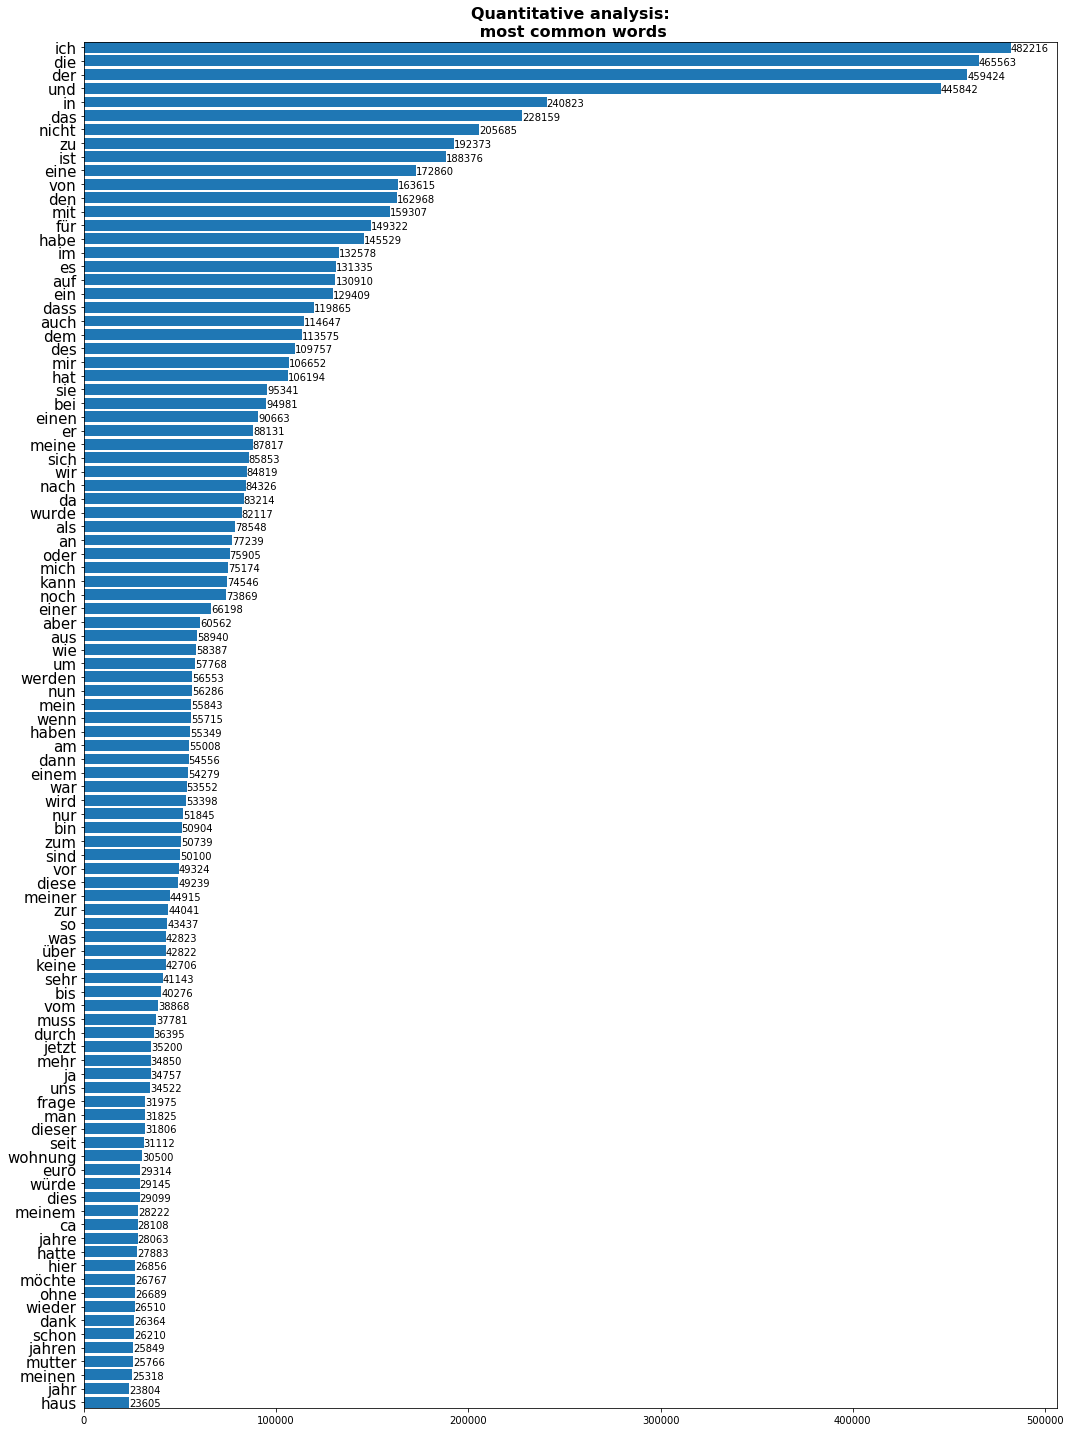

In [18]:
fig = plt.figure(figsize=(15,20))
ax = fig.subplots()
counts.reverse()
bar = ax.barh(np.arange(len(stopwords)),counts)
ax.set_yticks(np.arange(len(stopwords)))
plt.ylim(-0.4,len(stopwords)-0.6)
stopwords.reverse()
ax.set_yticklabels(stopwords,fontsize=15)
i = -0.3
for rect in bar:
    height = rect.get_width()
    plt.text(height,i, '%d' % int(height))#, ha='center', va='bottom')
    i+=1
plt.title('Quantitative analysis:\n most common words',fontsize=16,weight='bold')
plt.tight_layout()
#plt.savefig('disk/ERIK_ADVANCED_PRACTICAL/stopwords')
plt.show()
